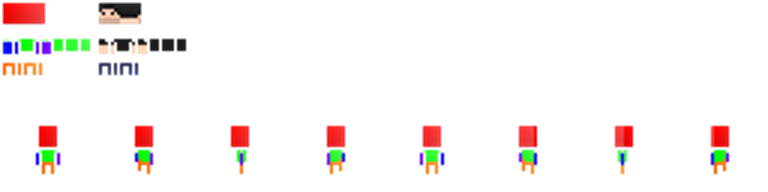

In [1]:
from PIL import Image


image = Image.open("Efe Map Rotation.png")

image_copy = image

resized_image = image.resize((image.width*3, image.height*3))

resized_image

In [2]:
def CreateColorData(pixels):
    color_data = {}

    for y in range(0,32):   #scanning the first 32*32 area for the color mapping
        for x in range(0,32):

            r,g,b,a = pixels[x,y]

            if a == 0:
                continue
            else:
                if(r,g,b,a) in color_data:
                    print("There is a pixel with the same color, coordinates = x={0},y={1}".format(x,y))
                    print(r,g,b,a)
                #key is map, value is the actual color
                color_data[(r,g,b,a)] = pixels[x+32,y]

    return color_data


In [3]:
def ApplyMap(color_data,pixels):
    for y in range(32,64):
        for x in range(0,image_copy.width):
            r,g,b,a = pixels[x,y]
            if (r,g,b,a) != (0,0,0,0):
                if (r,g,b,a) in color_data:
                    pixels[x,y] = color_data[(r,g,b,a)]
                else:
                    print("This pixel is not in the keys: {0}".format(pixels[x,y]))

           

In [4]:
pixels = image_copy.load()

color_data = CreateColorData(pixels)

ApplyMap(color_data,pixels)

image_copy.save("")



#result_resized = result.resize(result.width*3,result.height*3,None)

#result_resized


ValueError: unknown file extension: 

In [ ]:
import tkinter as tk
from tkinter import filedialog

# Create a Tkinter root window (if not already created)
root = tk.Tk()
root.withdraw()  # Hide the root window

# Open a file dialog for opening a file
file_path = filedialog.askopenfilename()

# Check if a file was selected
if file_path:
    print(f'Selected file: {file_path}')
else:
    print('No file selected')